# Preprocessing the data using Robust scaler 
RobustScaler scales the feature values based on the interquartile range (IQR) which is defined as the difference between the third quartile (75th percentile) and the first quartile (25th percentile). It then applies the following formula to each feature:

(x – Q2) / (Q3 – Q1)

where x is the feature value, Q2 is the median, Q3 is the third quartile, and Q1 is the first quartile.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
df=pd.read_csv('diabetes.csv')


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#analysing each colomn of the data so that outliers can be detected 

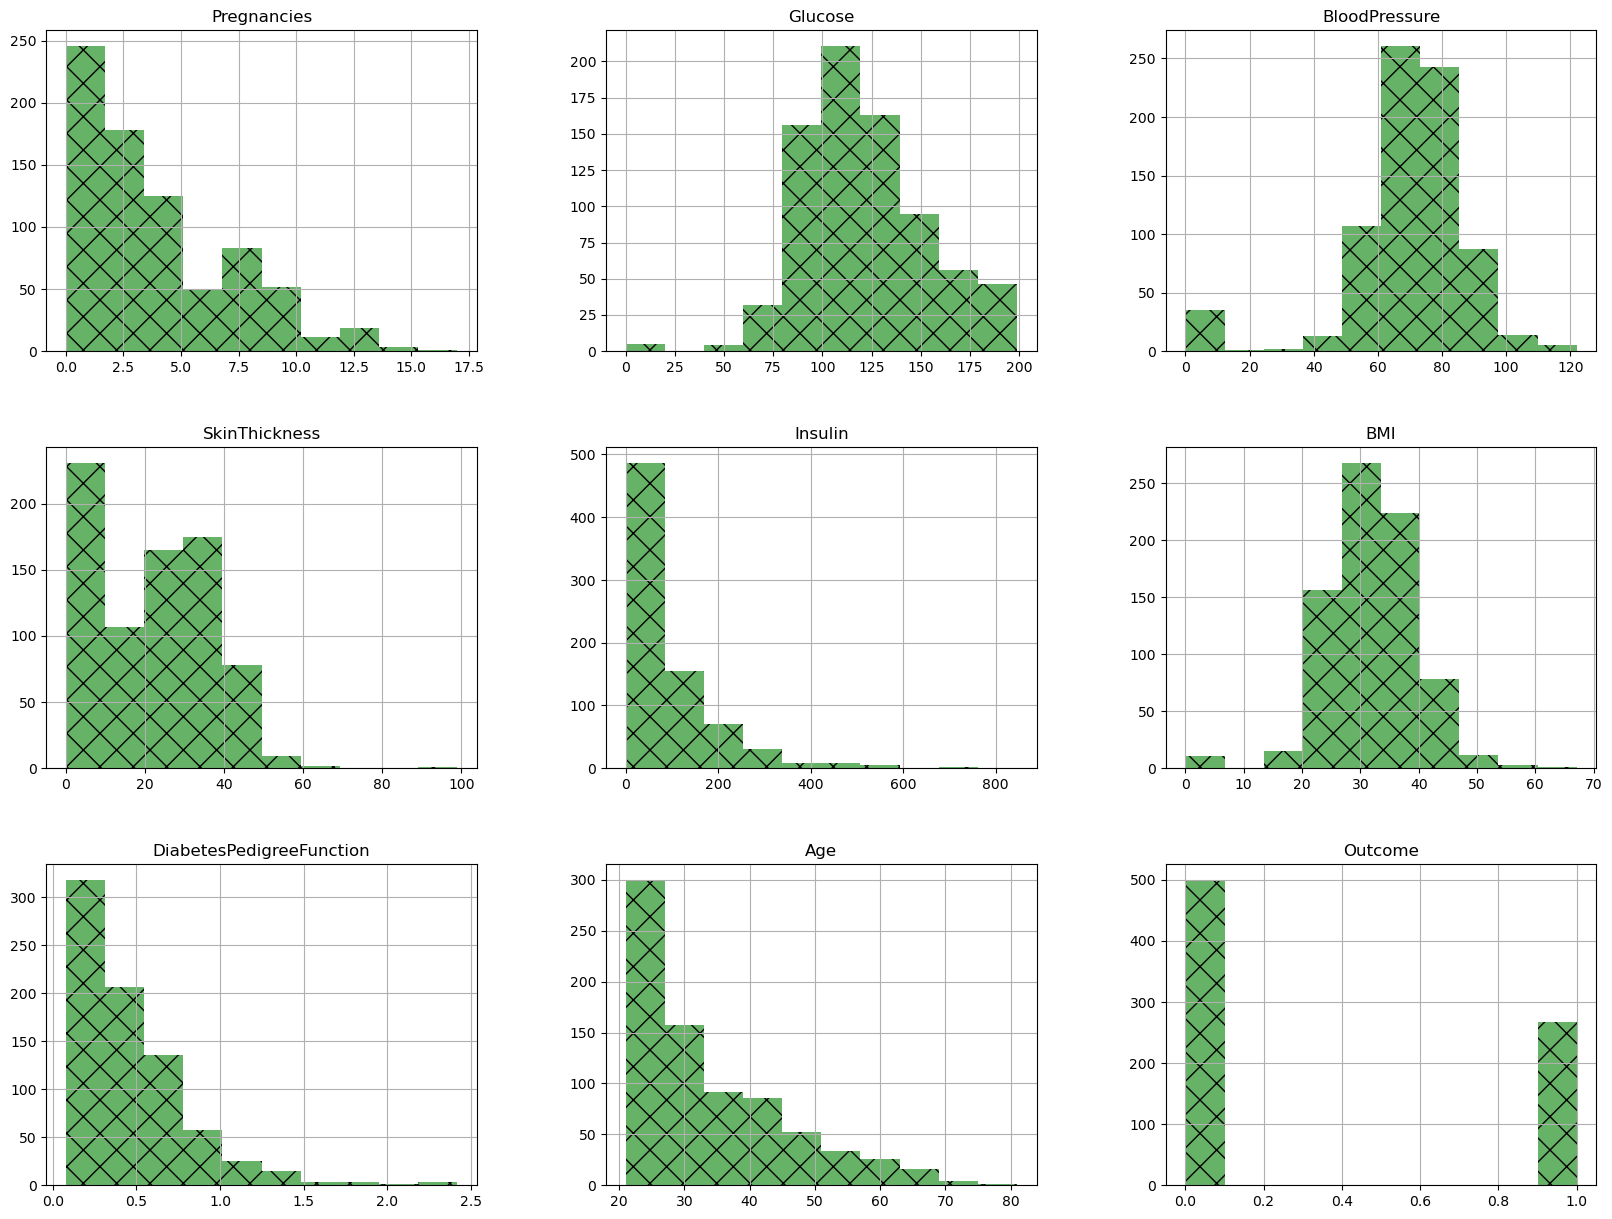

In [6]:
w = 5
df.hist(bins=10, figsize=(20,15), color='green', alpha=0.6, hatch='X', rwidth=w);

[Text(0.5, 1.0, 'Box Plot of Insulin')]

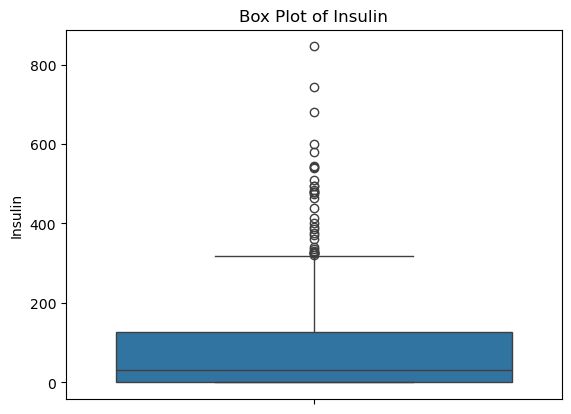

In [7]:
sns.boxplot(data=df["Insulin"]).set(title="Box Plot of Insulin")

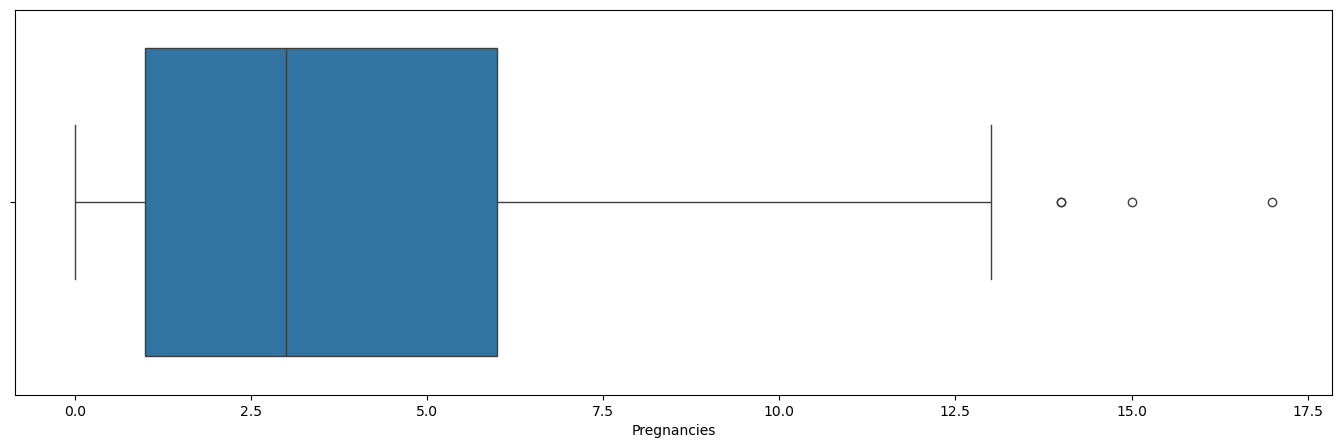

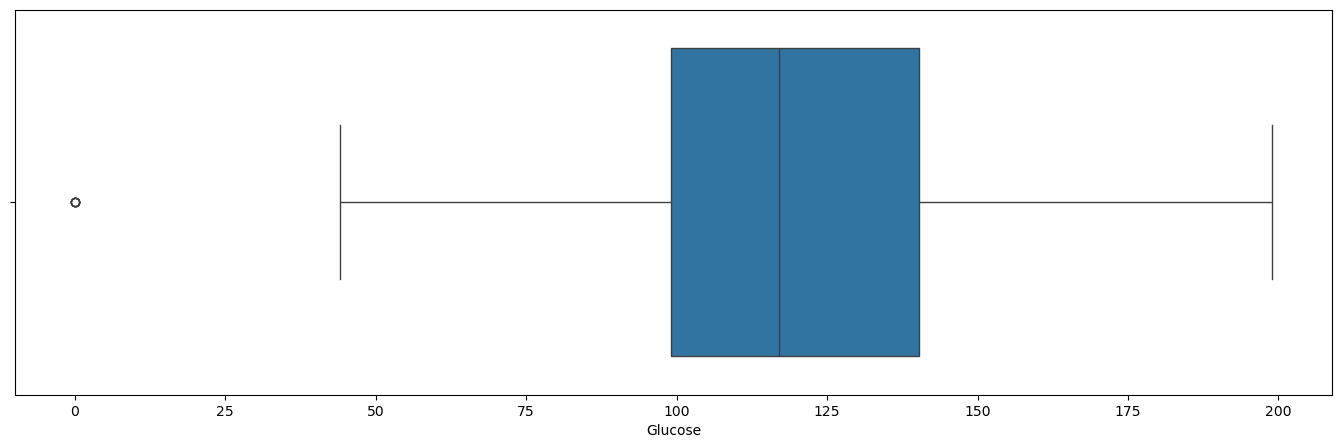

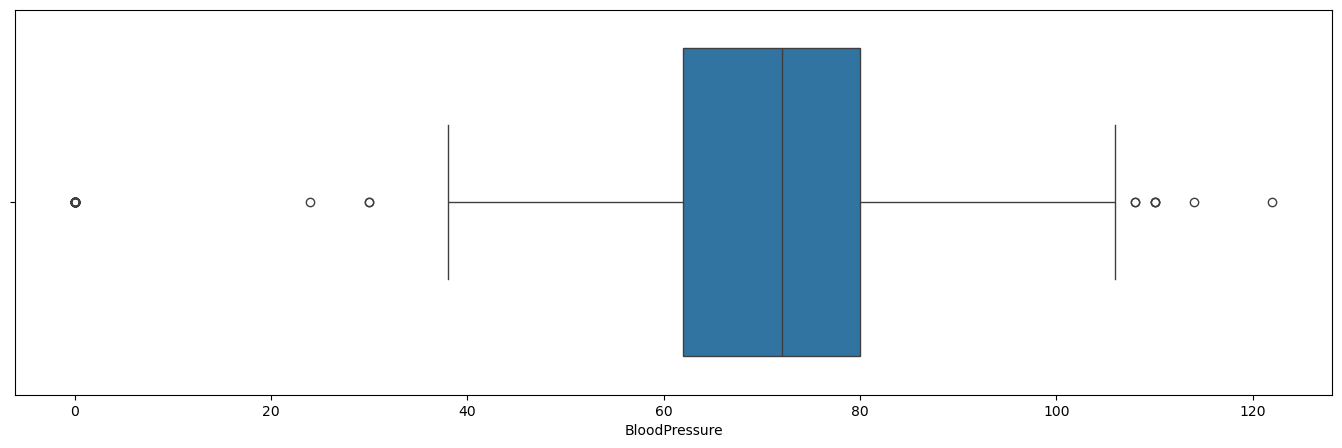

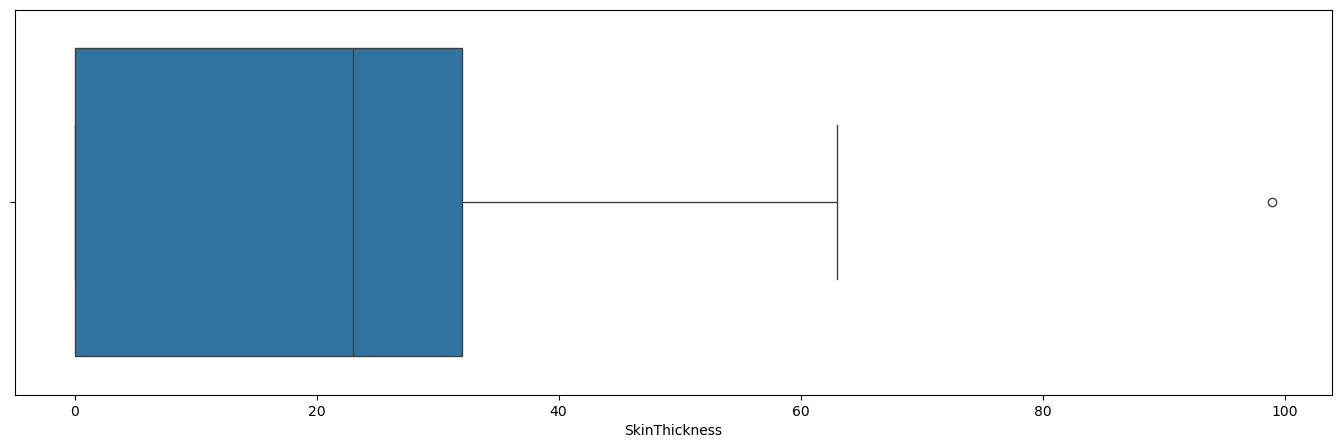

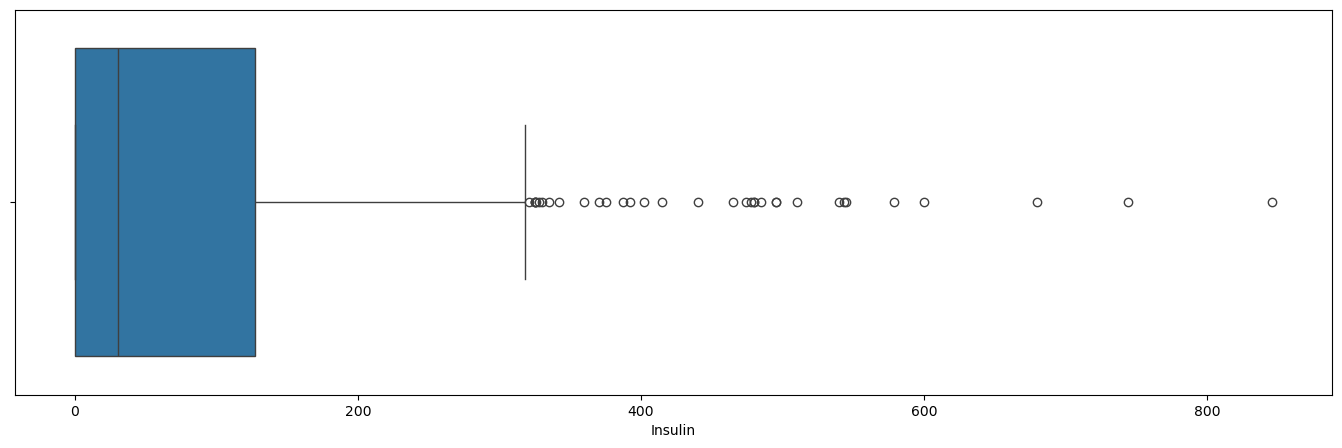

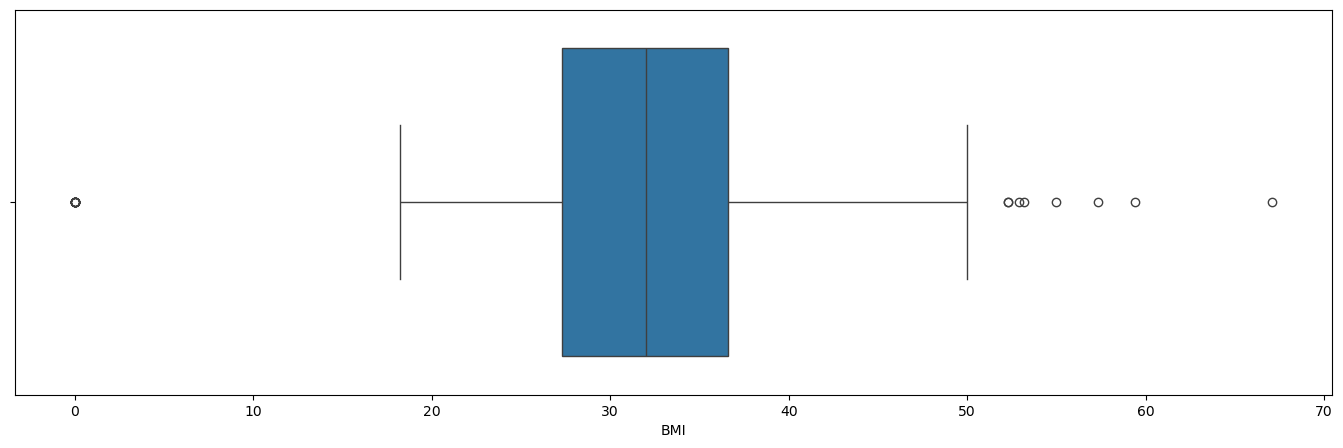

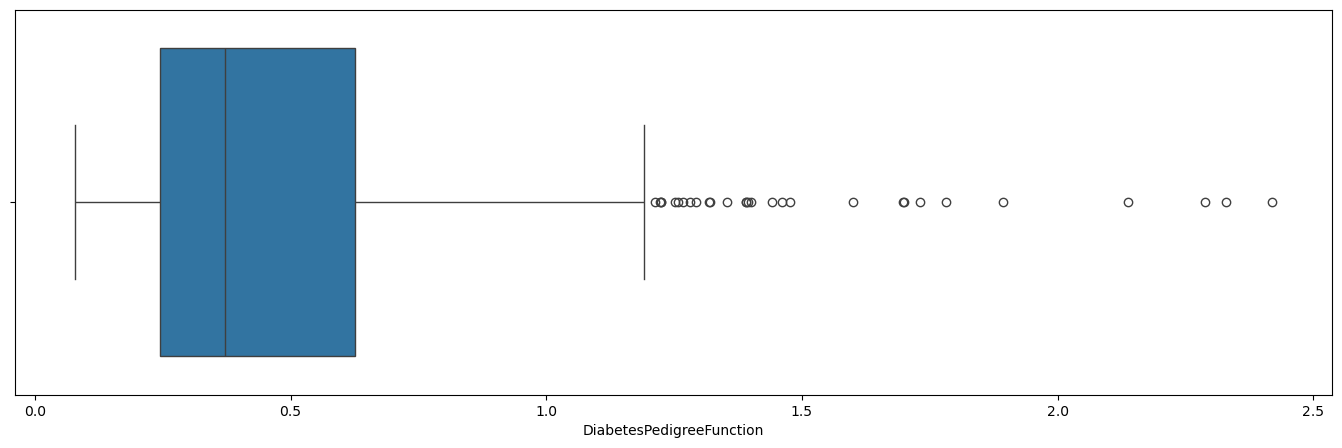

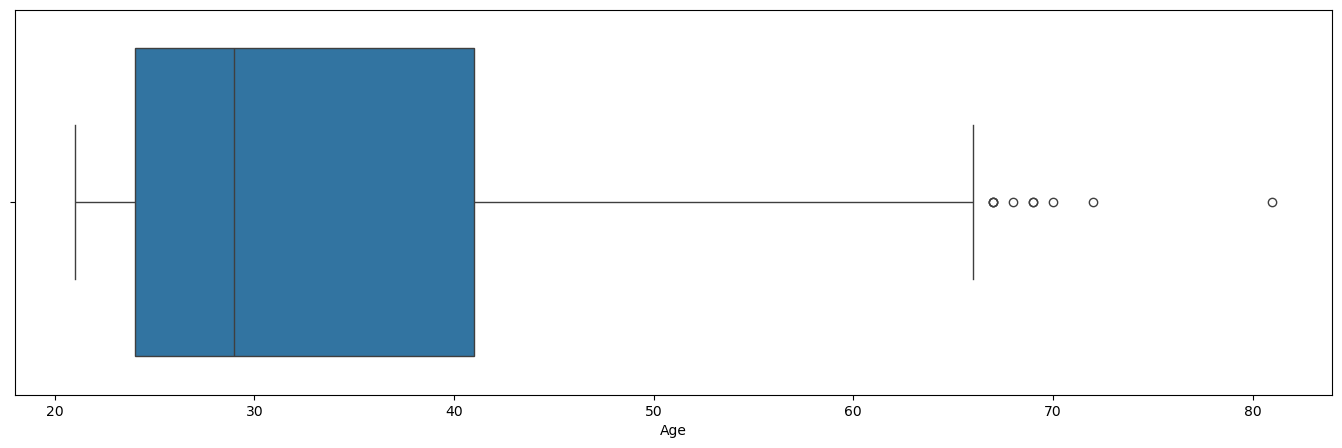

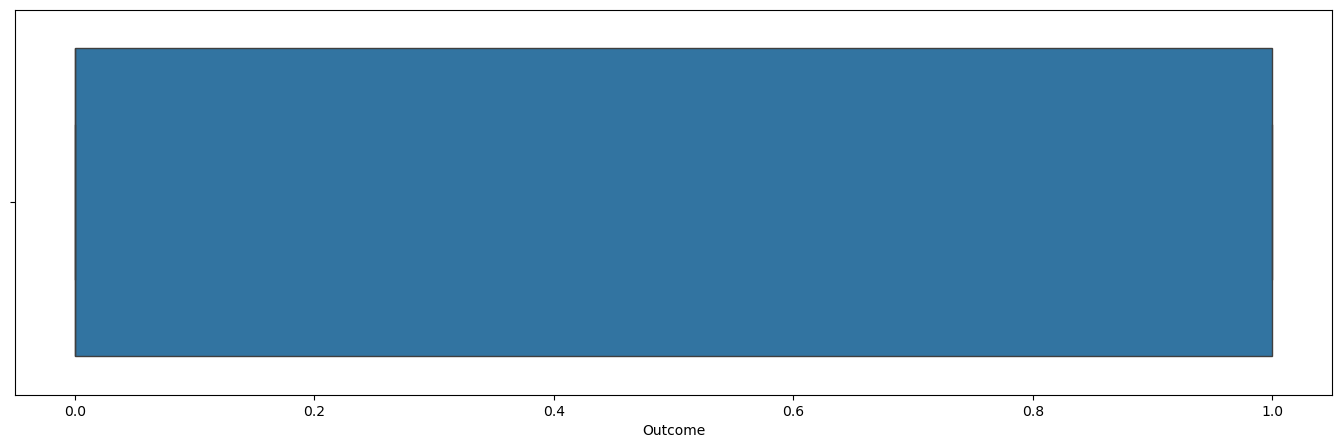

In [8]:
for column in df:
        plt.figure(figsize=(17,5))
        sns.boxplot(data=df, x=column)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
lower_limit = df["Insulin"].mean() - 3*df["Insulin"].std()
upper_limit = df["Insulin"].mean() + 3*df["Insulin"].std()
print(lower_limit)
print(upper_limit)

-265.9325278873484
425.53148622068176


In [11]:
df_new = df[(df["Insulin"] > lower_limit) & (df["Insulin"] < upper_limit)]

[Text(0.5, 1.0, 'Box Plot of Insulin')]

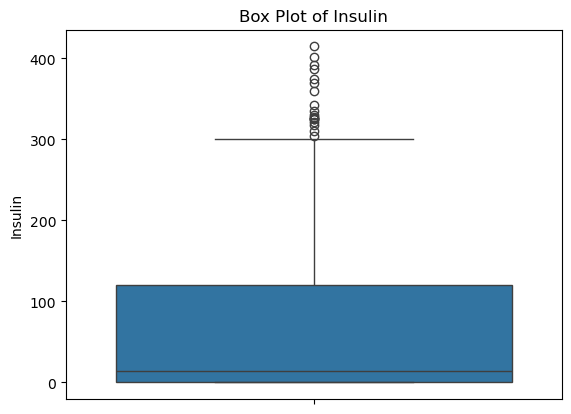

In [12]:
sns.boxplot(data=df_new["Insulin"]).set(title="Box Plot of Insulin")

In [13]:
df=df_new
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


[Text(0.5, 1.0, 'Box Plot of skinthickness')]

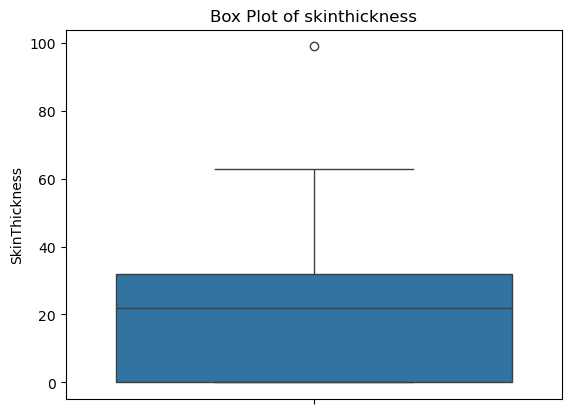

In [14]:
sns.boxplot(data=df["SkinThickness"]).set(title="Box Plot of skinthickness")

In [15]:
llower_limit = df["SkinThickness"].mean() - 3*df["SkinThickness"].std()
uupper_limit = df["SkinThickness"].mean() + 3*df["SkinThickness"].std()
df_n = df[(df["SkinThickness"] > llower_limit) & (df["SkinThickness"] < uupper_limit)]
df=df_n

In [16]:
blower_limit = df["DiabetesPedigreeFunction"].mean() - 3*df["DiabetesPedigreeFunction"].std()
aupper_limit = df["DiabetesPedigreeFunction"].mean() + 3*df["DiabetesPedigreeFunction"].std()
df_nas = df[(df["DiabetesPedigreeFunction"] > blower_limit) & (df["DiabetesPedigreeFunction"] < aupper_limit)]
df=df_nas

In [17]:
ablower_limit = df["BloodPressure"].mean() - 3*df["BloodPressure"].std()
abupper_limit = df["BloodPressure"].mean() + 3*df["BloodPressure"].std()
df_c = df[(df["BloodPressure"] > ablower_limit) & (df["BloodPressure"] < abupper_limit)]
df=df_c

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.894737,119.544808,72.431010,20.957326,72.184922,32.168137,0.450713,33.280228,0.335704
std,3.366123,31.426492,12.372104,15.369556,89.867281,7.095740,0.278718,11.759084,0.472572
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.350000,0.244500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,42.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,125.500000,36.400000,0.603000,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,415.000000,67.100000,1.400000,81.000000,1.000000


[Text(0.5, 1.0, 'Box Plot of skinthickness')]

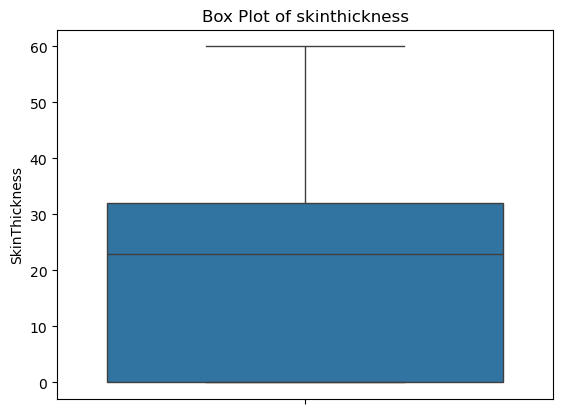

In [19]:
sns.boxplot(data=df["SkinThickness"]).set(title="Box Plot of skinthickness")

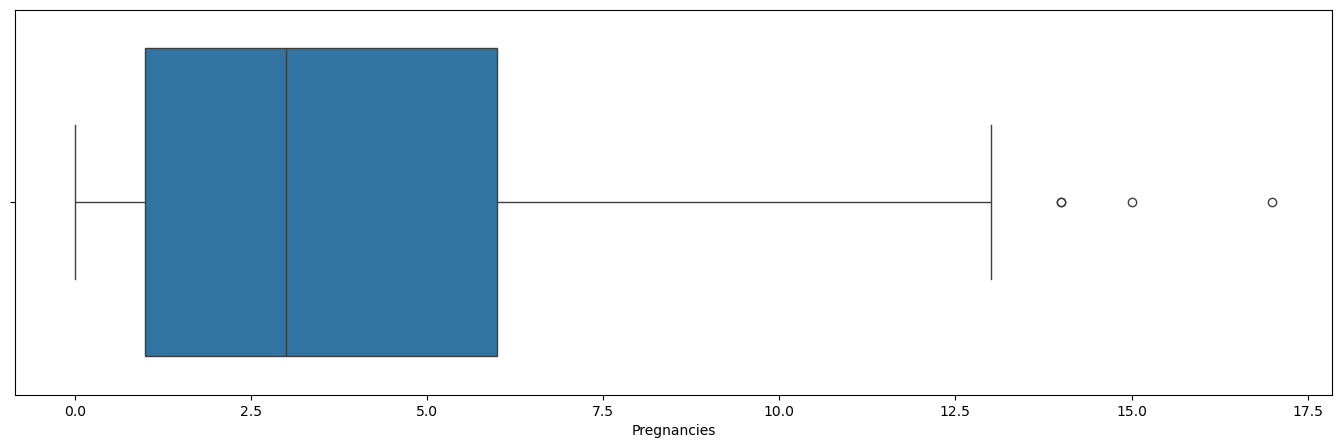

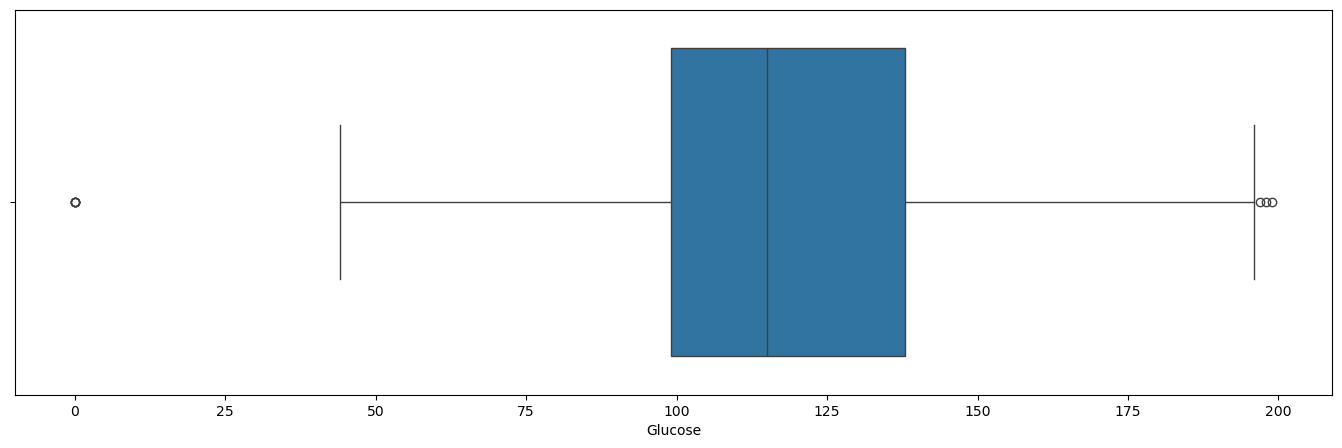

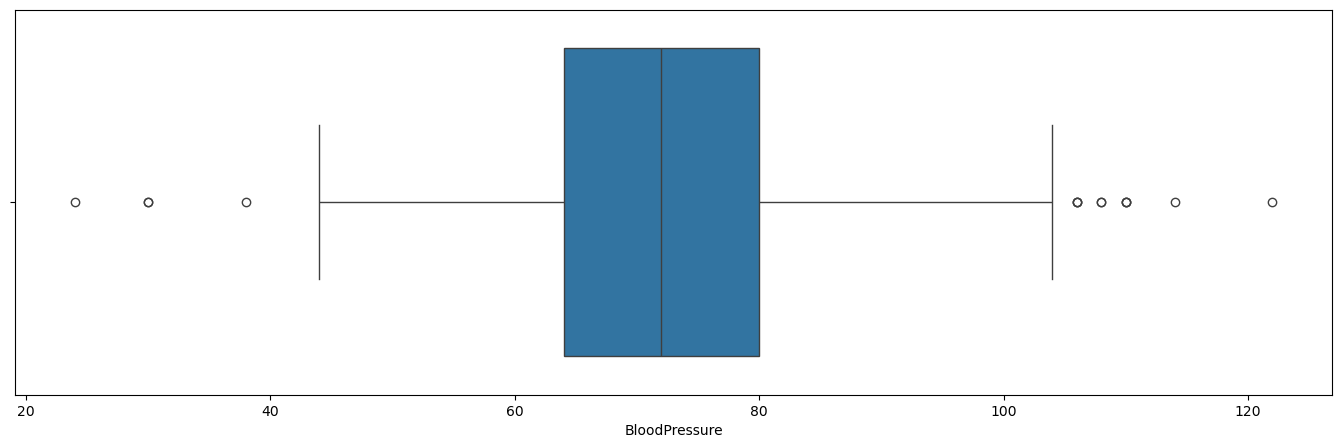

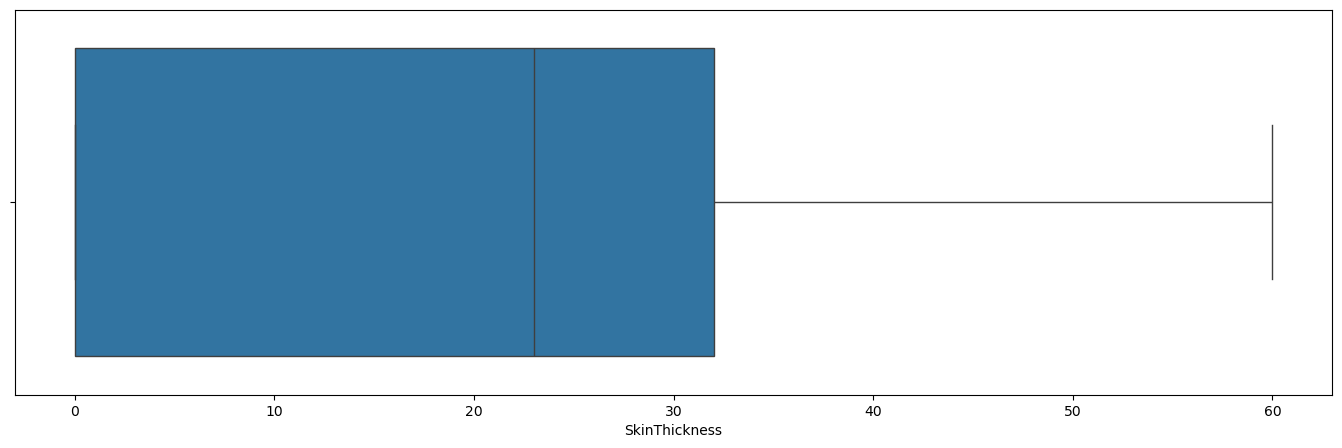

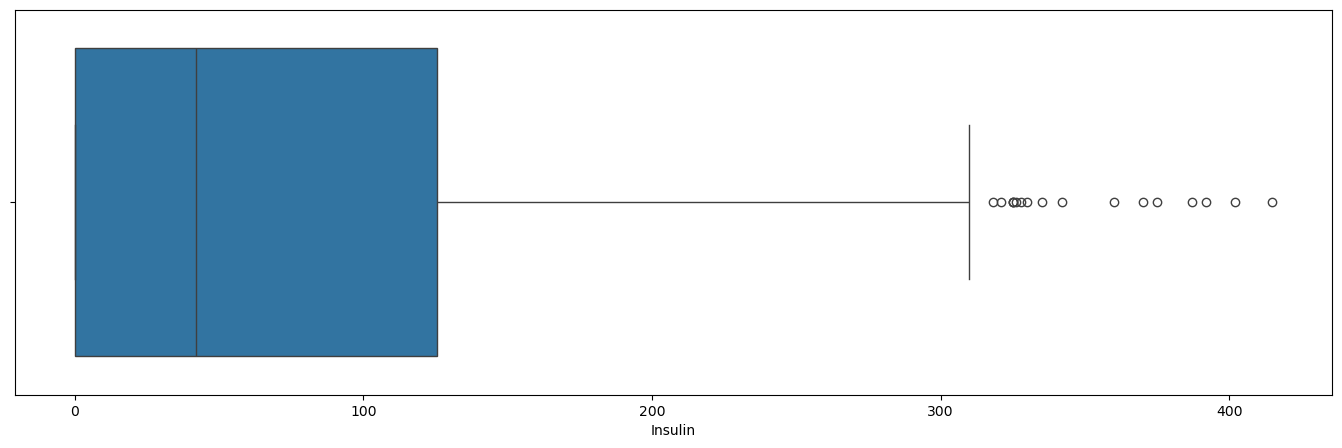

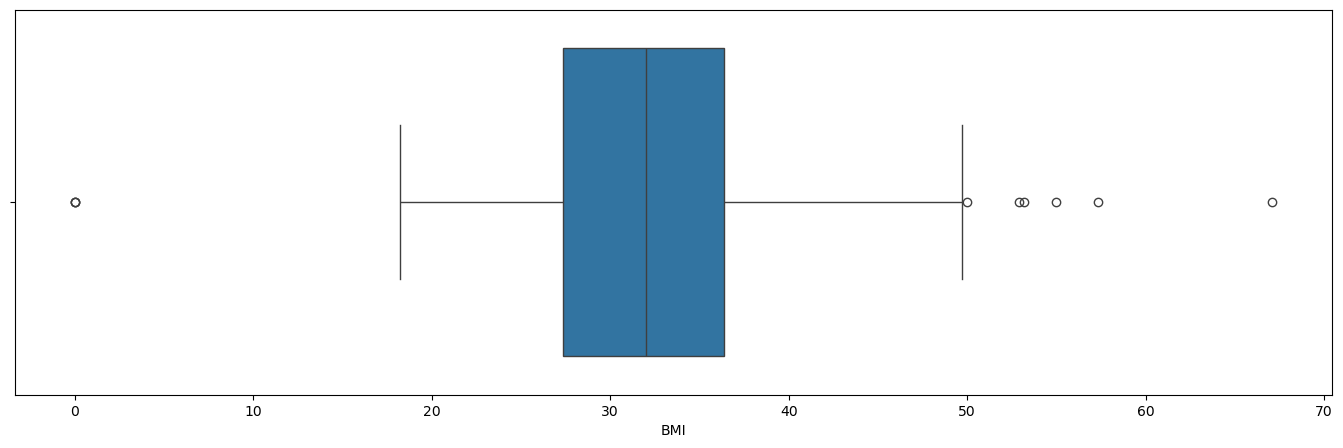

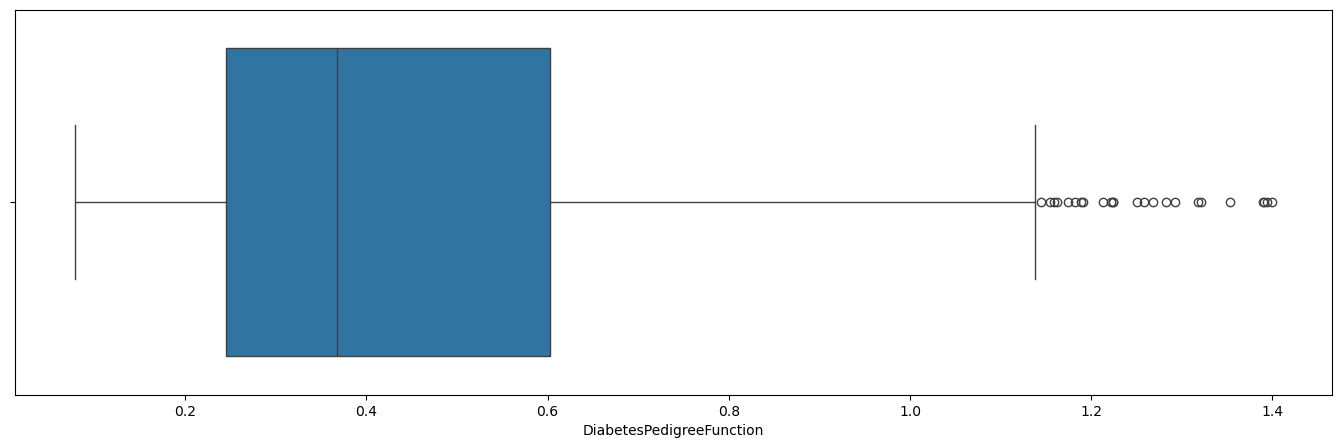

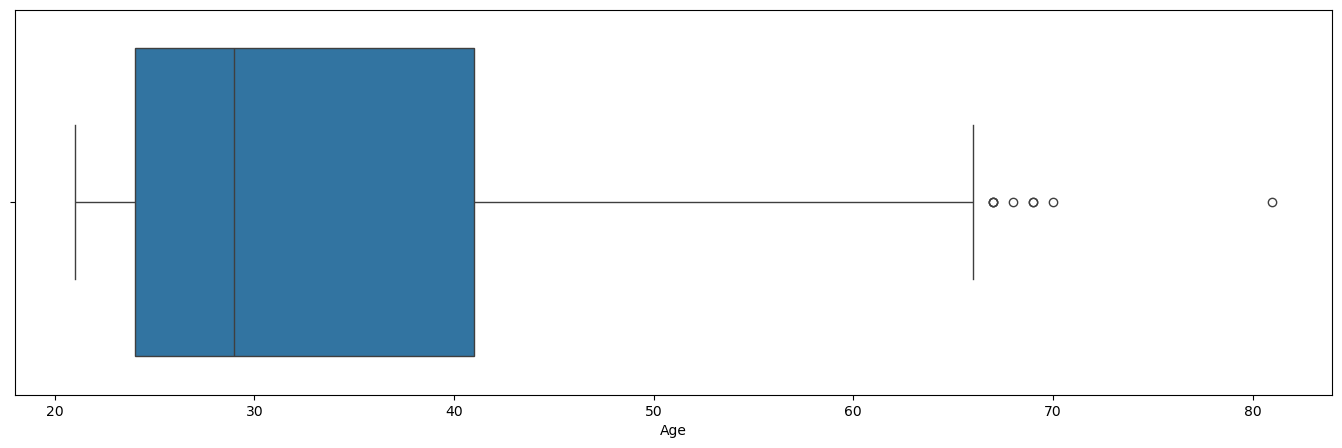

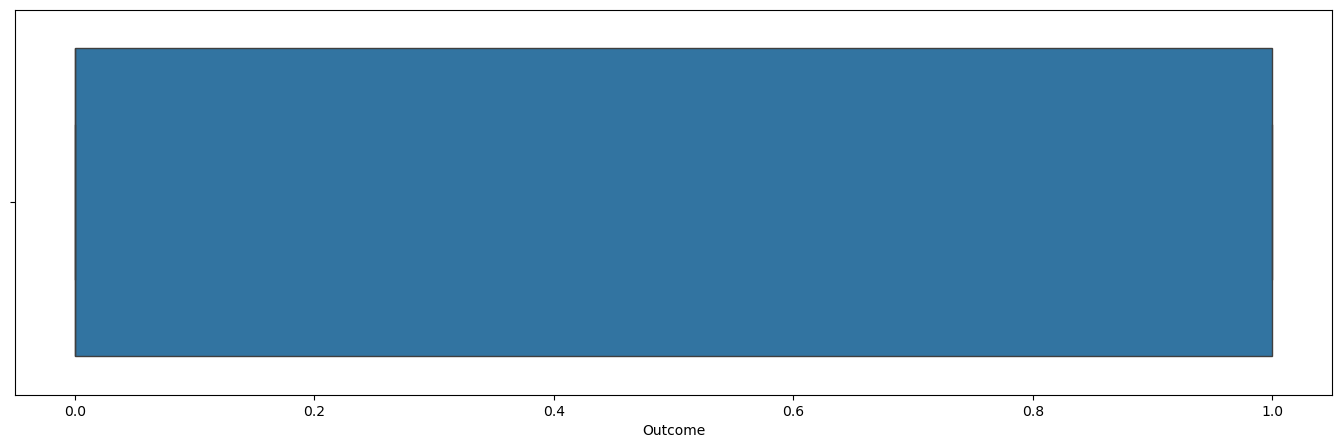

In [20]:
for column in df:
        plt.figure(figsize=(17,5))
        sns.boxplot(data=df, x=column)

[Text(0.5, 1.0, 'Box Plot of Age')]

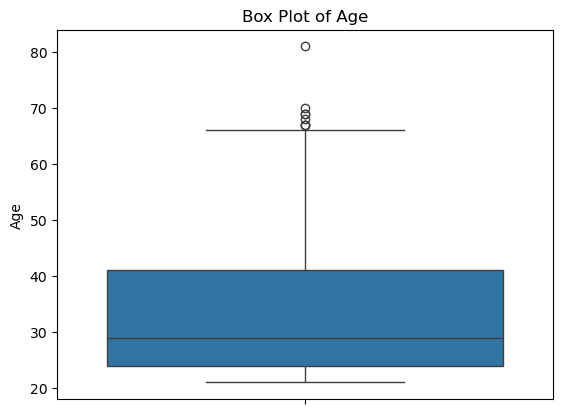

In [21]:
sns.boxplot(data=df["Age"]).set(title="Box Plot of Age")

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.894737,119.544808,72.431010,20.957326,72.184922,32.168137,0.450713,33.280228,0.335704
std,3.366123,31.426492,12.372104,15.369556,89.867281,7.095740,0.278718,11.759084,0.472572
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.350000,0.244500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,42.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,125.500000,36.400000,0.603000,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,415.000000,67.100000,1.400000,81.000000,1.000000


In [23]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [24]:
#scaling using Robustscaler to normalize the data
scaler = RobustScaler()
scaler.fit(x)
imputed_x_= scaler.transform(x)
#X_test_scaled = scaler.transform(imputed_x_test)
RobustScaler()

RobustScaler()

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
my_imputer = SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_x_test = pd.DataFrame(my_imputer.transform(x_test))

# Imputation removed column names; put them back
imputed_x_train.columns = x_train.columns
imputed_x_test.columns = x_test.columns

In [27]:
x_test=imputed_x_test
x_train=imputed_x_train

In [28]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
param_grid= {'kernel': ('linear', 'rbf'),'C': [1, 10, 100]}
base_estimator = svm.SVC(gamma='scale')
clf= HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, max_resources=40,
                         aggressive_elimination=False).fit(x_train,y_train)

In [29]:
#checking the accuracy score using SVM

x_train_prediction_svm=clf.predict(x_train)
from sklearn.metrics import accuracy_score


In [30]:
#checking the accuracy score using LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)



LogisticRegression(max_iter=1000)

In [31]:
#using knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [32]:
#checking the accuracy score using Decisiontree
from sklearn import tree
dst = tree.DecisionTreeClassifier(criterion="entropy")
dst = dst.fit(x_train,y_train)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rf=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [43]:
classifier_rf = GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv= 5)
classifier_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [46]:
classifier_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [47]:
classifier_rf=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=5, criterion='gini')

In [48]:
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [49]:
def accuracy(X,x,Y,y,method):
    accuracy_train=accuracy_score(X,Y)
    accuracy_test=accuracy_score(x,y)
    print('accuracy score for training  using ' ,accuracy_train )
    print('accuracy score using for validation  ',accuracy_test )

print("RandomForestClassifier")
accuracy(classifier_rf.predict(x_train),classifier_rf.predict(x_test),y_train,y_test,RandomForestClassifier)


print("\nSVM")
accuracy(clf.predict(x_train),clf.predict(x_test),y_train,y_test,RandomForestClassifier)


print("\nLogistic regression ")
accuracy(lr.predict(x_train),lr.predict(x_test),y_train,y_test,RandomForestClassifier)

print("\nDecision tree")
accuracy(dst.predict(x_train),dst.predict(x_test),y_train,y_test,RandomForestClassifier)

print("\nK nearest neighbours")
accuracy(knn.predict(x_train),knn.predict(x_test),y_train,y_test,RandomForestClassifier)


    


RandomForestClassifier
accuracy score for training  using  0.8612099644128114
accuracy score using for validation   0.7375886524822695

SVM
accuracy score for training  using  0.8167259786476868
accuracy score using for validation   0.6950354609929078

Logistic regression 
accuracy score for training  using  0.7882562277580071
accuracy score using for validation   0.7659574468085106

Decision tree
accuracy score for training  using  1.0
accuracy score using for validation   0.7092198581560284

K nearest neighbours
accuracy score for training  using  0.802491103202847
accuracy score using for validation   0.6950354609929078


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 